In [5]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("data/datafest2018.csv")

In [3]:
data.head()

,date,companyId,jobId,country,stateProvince,city,avgOverallRating,numReviews,industry,normTitle,...,experienceRequired,estimatedSalary,salaryCurrency,jobLanguage,supervisingJob,licenseRequiredJob,educationRequirement,jobAgeDays,clicks,localClicks
0,2016-10-01,company00000,job0000000,US,TX,Dallas-Fort Worth,0.0,NaN,NaN,home health aide,...,NaN,69300,NaN,EN,0.0,1.0,None,97,18,2
1,2016-10-01,company00001,job0000001,US,MA,Boston,4.0,551.0,HEALTH_CARE,senior food service worker,...,0.0,22700,NaN,EN,0.0,0.0,High school,94,14,3
2,2016-10-01,company00002,job0000002,US,FL,Melbourne,0.0,NaN,NaN,field service engineer,...,5.0,66000,NaN,EN,0.0,0.0,Higher education,92,7,0
3,2016-10-01,company00003,job0000003,US,MA,Plymouth,3.8,73.0,NaN,cashier,...,1.0,14900,NaN,EN,0.0,0.0,High school,84,23,23
4,2016-10-01,company00004,job0000004,CA,QC,Montréal,3.5,112.0,NaN,reservation agent,...,NaN,33500,NaN,EN,0.0,0.0,None,81,8,2


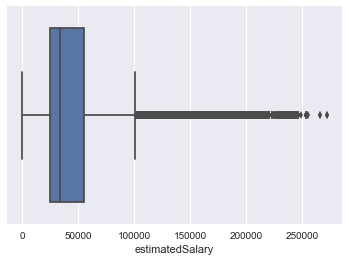

In [6]:
sns.boxplot(data["estimatedSalary"])

C:\Users\slee7268\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


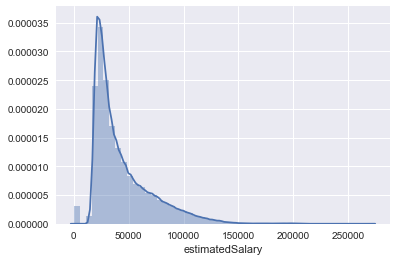

In [7]:
sns.distplot(data["estimatedSalary"])

Text(0.5,1,'Number of Jobs by State')

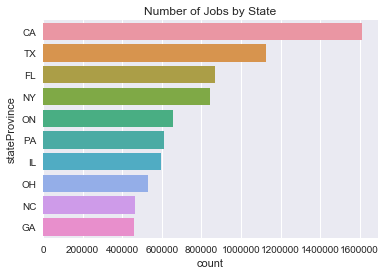

In [9]:
sns.countplot(y=data["stateProvince"], data=data, order = data.stateProvince.value_counts().iloc[:10].index).set_title("Number of Jobs by State")

Text(0.5,1,'Number of Jobs by City')

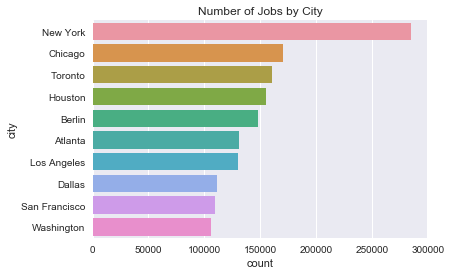

In [14]:
sns.countplot(y=data["city"], data=data, order = data.city.value_counts().iloc[:10].index).set_title("Number of Jobs by City")

Text(0.5,1,'Number of Jobs by Industry')

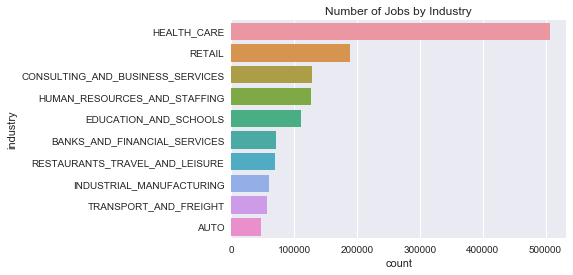

In [11]:
sns.countplot(y=data["industry"], data=data, order = data.industry.value_counts().iloc[:10].index).set_title("Number of Jobs by Industry")

Text(0.5,1,'Number of Jobs by Category')

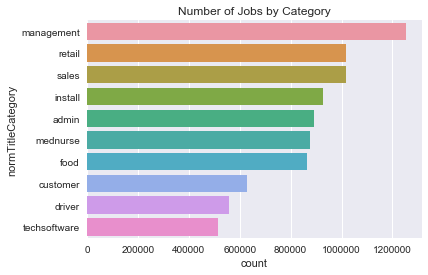

In [13]:
sns.countplot(y=data["normTitleCategory"], data=data, order = data.normTitleCategory.value_counts().iloc[:10].index).set_title("Number of Jobs by Category")